# Stock Prices Prediction Using Keras Long Term Short Memory - Amazon


In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import quandl

%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
df = quandl.get('WIKI/AMZN')

print(df.head())

             Open   High    Low     ...       Adj. Low  Adj. Close  \
Date                                ...                              
1997-05-16  22.38  23.75  20.50     ...          1.708       1.729   
1997-05-19  20.50  21.25  19.50     ...          1.625       1.708   
1997-05-20  20.75  21.00  19.63     ...          1.636       1.636   
1997-05-21  19.25  19.75  16.50     ...          1.375       1.427   
1997-05-22  17.25  17.38  15.75     ...          1.312       1.396   

            Adj. Volume  
Date                     
1997-05-16    1.470e+07  
1997-05-19    6.107e+06  
1997-05-20    5.467e+06  
1997-05-21    1.885e+07  
1997-05-22    1.178e+07  

[5 rows x 12 columns]


In [3]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend',
       'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close',
       'Adj. Volume'],
      dtype='object')

In [4]:
df.drop(['Ex-Dividend','Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Volume'], axis=1)

               Open     High      Low    Close     Volume  Adj. Close
Date                                                                 
1997-05-16    22.38    23.75    20.50    20.75  1.225e+06       1.729
1997-05-19    20.50    21.25    19.50    20.50  5.089e+05       1.708
1997-05-20    20.75    21.00    19.63    19.63  4.556e+05       1.636
1997-05-21    19.25    19.75    16.50    17.13  1.571e+06       1.427
1997-05-22    17.25    17.38    15.75    16.75  9.814e+05       1.396
...             ...      ...      ...      ...        ...         ...
2018-03-21  1586.45  1590.00  1563.17  1581.86  4.667e+06    1581.860
2018-03-22  1565.47  1573.85  1542.40  1544.10  6.178e+06    1544.100
2018-03-23  1539.01  1549.02  1495.36  1495.56  7.844e+06    1495.560
2018-03-26  1530.00  1556.99  1499.25  1555.86  5.548e+06    1555.860
2018-03-27  1572.40  1575.96  1482.32  1497.05  6.793e+06    1497.050

[5248 rows x 6 columns]

In [5]:
df.to_csv('./data/AMZN.csv')

In [6]:
# Importing the training set
dataset_train = pd.read_csv('./data/AMZN.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [7]:
dataset_train.head()


         Date   Open   High     ...       Adj. Low  Adj. Close  Adj. Volume
0  1997-05-16  22.38  23.75     ...          1.708       1.729    1.470e+07
1  1997-05-19  20.50  21.25     ...          1.625       1.708    6.107e+06
2  1997-05-20  20.75  21.00     ...          1.636       1.636    5.467e+06
3  1997-05-21  19.25  19.75     ...          1.375       1.427    1.885e+07
4  1997-05-22  17.25  17.38     ...          1.312       1.396    1.178e+07

[5 rows x 13 columns]

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
# Creating a data structure with 60 timesteps and 1 output
# Tried All data point, 1500, 900, 100
X_train = []
y_train = []
for i in range(60, 150):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 4, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [13]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 4, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 4, return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 4))
regressor.add(Dropout(0.2))


In [16]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 500, batch_size = 32)



Epoch 1/500
90/90 [==============================] - 4s 50ms/step - loss: 5.3918e-04
Epoch 2/500
90/90 [==============================] - 0s 5ms/step - loss: 1.8142e-04
Epoch 3/500
90/90 [==============================] - 0s 5ms/step - loss: 1.3390e-04
Epoch 4/500
90/90 [==============================] - 0s 5ms/step - loss: 1.3810e-04
Epoch 5/500
90/90 [==============================] - 0s 5ms/step - loss: 1.6508e-04
Epoch 6/500
90/90 [==============================] - 0s 5ms/step - loss: 9.5120e-05
Epoch 7/500
90/90 [==============================] - 0s 5ms/step - loss: 8.0698e-05
Epoch 8/500
90/90 [==============================] - 1s 6ms/step - loss: 5.9611e-05
Epoch 9/500
90/90 [==============================] - 0s 5ms/step - loss: 7.6820e-05
Epoch 10/500
90/90 [==============================] - 0s 5ms/step - loss: 8.9651e-05
Epoch 11/500
90/90 [==============================] - 0s 5ms/step - loss: 7.4889e-05
Epoch 12/500
90/90 [==============================] - 0s 6ms/step - loss:

90/90 [==============================] - 0s 5ms/step - loss: 4.6948e-05
Epoch 98/500
90/90 [==============================] - 0s 5ms/step - loss: 4.5457e-05
Epoch 99/500
90/90 [==============================] - 0s 5ms/step - loss: 4.5489e-05
Epoch 100/500
90/90 [==============================] - 0s 5ms/step - loss: 4.7164e-05
Epoch 101/500
90/90 [==============================] - 0s 5ms/step - loss: 4.6303e-05
Epoch 102/500
90/90 [==============================] - 0s 5ms/step - loss: 4.6828e-05
Epoch 103/500
90/90 [==============================] - 0s 5ms/step - loss: 4.4811e-05
Epoch 104/500
90/90 [==============================] - 0s 5ms/step - loss: 4.7137e-05
Epoch 105/500
90/90 [==============================] - 0s 5ms/step - loss: 4.5958e-05
Epoch 106/500
90/90 [==============================] - 0s 5ms/step - loss: 4.5111e-05
Epoch 107/500
90/90 [==============================] - 0s 5ms/step - loss: 4.5904e-05
Epoch 108/500
90/90 [==============================] - 0s 5ms/step - l

90/90 [==============================] - 0s 5ms/step - loss: 2.3807e-05
Epoch 193/500
90/90 [==============================] - 0s 5ms/step - loss: 2.2889e-05
Epoch 194/500
90/90 [==============================] - 0s 5ms/step - loss: 2.3476e-05
Epoch 195/500
90/90 [==============================] - 0s 5ms/step - loss: 2.0887e-05
Epoch 196/500
90/90 [==============================] - 0s 5ms/step - loss: 2.5178e-05
Epoch 197/500
90/90 [==============================] - 0s 5ms/step - loss: 2.1325e-05
Epoch 198/500
90/90 [==============================] - 0s 5ms/step - loss: 2.2204e-05
Epoch 199/500
90/90 [==============================] - 0s 5ms/step - loss: 2.1169e-05
Epoch 200/500
90/90 [==============================] - 0s 5ms/step - loss: 2.3173e-05
Epoch 201/500
90/90 [==============================] - 0s 5ms/step - loss: 2.3722e-05
Epoch 202/500
90/90 [==============================] - 1s 7ms/step - loss: 2.4456e-05
Epoch 203/500
90/90 [==============================] - 3s 31ms/step 

90/90 [==============================] - 1s 6ms/step - loss: 1.9920e-05
Epoch 288/500
90/90 [==============================] - 0s 5ms/step - loss: 2.0507e-05
Epoch 289/500
90/90 [==============================] - 0s 5ms/step - loss: 2.0672e-05
Epoch 290/500
90/90 [==============================] - 0s 5ms/step - loss: 1.8087e-05
Epoch 291/500
90/90 [==============================] - 0s 5ms/step - loss: 2.2204e-05
Epoch 292/500
90/90 [==============================] - 0s 5ms/step - loss: 1.8784e-05
Epoch 293/500
90/90 [==============================] - 2s 25ms/step - loss: 2.3269e-05
Epoch 294/500
90/90 [==============================] - 1s 14ms/step - loss: 1.8875e-05
Epoch 295/500
90/90 [==============================] - 0s 5ms/step - loss: 1.8706e-05
Epoch 296/500
90/90 [==============================] - 0s 5ms/step - loss: 2.3963e-05
Epoch 297/500
90/90 [==============================] - 1s 6ms/step - loss: 2.2998e-05
Epoch 298/500
90/90 [==============================] - 0s 5ms/step

90/90 [==============================] - 1s 6ms/step - loss: 2.1887e-05
Epoch 383/500
90/90 [==============================] - 0s 5ms/step - loss: 1.8813e-05
Epoch 384/500
90/90 [==============================] - 3s 33ms/step - loss: 1.8573e-05
Epoch 385/500
90/90 [==============================] - 1s 6ms/step - loss: 1.5458e-05
Epoch 386/500
90/90 [==============================] - 1s 6ms/step - loss: 1.8113e-05
Epoch 387/500
90/90 [==============================] - 1s 6ms/step - loss: 2.0675e-05
Epoch 388/500
90/90 [==============================] - 1s 7ms/step - loss: 1.4543e-05
Epoch 389/500
90/90 [==============================] - 1s 6ms/step - loss: 1.8435e-05
Epoch 390/500
90/90 [==============================] - 0s 6ms/step - loss: 2.5131e-05
Epoch 391/500
90/90 [==============================] - 1s 6ms/step - loss: 1.7891e-05
Epoch 392/500
90/90 [==============================] - 1s 6ms/step - loss: 1.8786e-05
Epoch 393/500
90/90 [==============================] - 1s 6ms/step 

90/90 [==============================] - 1s 6ms/step - loss: 1.7949e-05
Epoch 478/500
90/90 [==============================] - 0s 6ms/step - loss: 1.7401e-05
Epoch 479/500
90/90 [==============================] - 1s 7ms/step - loss: 1.4372e-05
Epoch 480/500
90/90 [==============================] - 1s 6ms/step - loss: 1.6163e-05
Epoch 481/500
90/90 [==============================] - 1s 9ms/step - loss: 1.7346e-05
Epoch 482/500
90/90 [==============================] - 0s 5ms/step - loss: 1.5457e-05
Epoch 483/500
90/90 [==============================] - 0s 5ms/step - loss: 1.5669e-05
Epoch 484/500
90/90 [==============================] - 1s 6ms/step - loss: 1.6483e-05
Epoch 485/500
90/90 [==============================] - 0s 5ms/step - loss: 1.6595e-05
Epoch 486/500
90/90 [==============================] - 0s 5ms/step - loss: 1.7476e-05
Epoch 487/500
90/90 [==============================] - 2s 21ms/step - loss: 1.8427e-05
Epoch 488/500
90/90 [==============================] - 2s 17ms/step

In [17]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of Apr - Nov 2018
dataset_test = pd.read_csv('./data/AMZN18.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
# Getting the predicted stock price of 2018
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 500):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


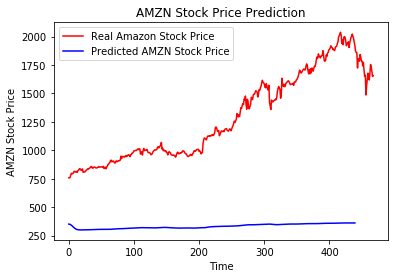

In [19]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Amazon Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted AMZN Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.rcParams['figure.figsize'] = (12,9)
plt.show()

In [20]:
import pandashells